In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.optimizers import Adam
import seaborn as sns

In [10]:
model = Sequential([
    Dense(20, input_dim=10, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(2, activation='softmax')
])

model.compile(Adam(lr=.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

xtrain = pd.read_csv("X_train.csv").to_numpy()
ytrain = pd.read_csv("y_train.csv").to_numpy().flatten()

model.fit(xtrain, ytrain, epochs=100, batch_size=64)

def predict_model(input):
    inputr = model(input.reshape(1, 10))[0]
    classes = sorted(np.unique(ytrain))
    prediction = classes[np.argmax(inputr)]
    return prediction
    

xtest = pd.read_csv("X_test.csv").to_numpy()
ytest = pd.read_csv("y_test.csv").to_numpy().flatten()    
    
guesses = np.array([predict_model(i) for i in xtest])

Epoch 1/100
2/2 [==============================] - 0s 998us/step - loss: 0.6394 - accuracy: 0.6720
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6317 - accuracy: 0.6720
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6253 - accuracy: 0.6720
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6201 - accuracy: 0.6720
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6720
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.6720
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 0.6064 - accuracy: 0.6720
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.6720
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.6720
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6720
Epoch 11/100
2/2 [==========

2/2 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.8560
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.9040
Epoch 86/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9280
Epoch 87/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.9280
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9280
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.9280
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.9280
Epoch 91/100
2/2 [==============================] - 0s 923us/step - loss: 0.2650 - accuracy: 0.9280
Epoch 92/100
2/2 [==============================] - 0s 997us/step - loss: 0.2622 - accuracy: 0.9280
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.9280
Epoch 94/100
2/2 [===========

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.model_selection as model_selection
from sklearn import metrics


def get_scores(acc, labels, prediction):
    f1 = metrics.f1_score(labels, prediction)
    conf_matrix = metrics.confusion_matrix(labels, prediction)
    sens = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    auc = metrics.roc_auc_score(labels, prediction)
    return sens, spec, f1, auc, acc


acc = accuracy_score(ytest, guesses)
sens, spec, f1, AUC, acc = get_scores(acc, ytest, guesses)
values = [sens, spec, f1, AUC, acc]
print(values)

[0.8285714285714286, 1.0, 0.8636363636363636, 0.9142857142857143, 0.8888888888888888]


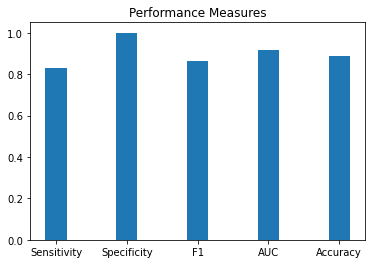

In [22]:
labels = ["Sensitivity", "Specificity", "F1", "AUC", "Accuracy"]
plt.title("Performance Measures")
width =0.3
plt.xticks(range(len(labels)), labels)
plt.bar(np.arange(len(values)), values, width=width)
plt.show()